In [ ]:
import numpy as np
import math
from scipy.stats import norm
import time
import pandas as pd
import statsmodels.api as sm
from keras.layers import Dense, Dropout, LSTM, Embedding,SimpleRNN
from keras.models import Sequential
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
# Transmited label data file
from google.colab import files
import io
#number of receiverd particle
uploadedy = files.upload()

Saving x_y.csv to x_y (2).csv


In [ ]:
data = pd.read_csv('x_y.csv')

In [ ]:
X = data['X']
Y = data["Y"]

In [ ]:
print(X)

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
5495    19080.0
5496    19076.0
5497    19154.0
5498    19067.0
5499    18929.0
Name: X, Length: 5500, dtype: float64


In [ ]:
X = np.array(data['X'])
X = np.reshape(X, (5500,1))
Y = np.array(data['Y'])
Y = np.reshape(Y, (5500,1))

In [ ]:
from keras.optimizers import Adam
model = Sequential()

model.add(Dense(5, input_dim=1, activation='tanh'))
for i in range(8):
  model.add(Dense(5, input_dim=5, activation='tanh'))
model.add(Dense(1, input_dim=5, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])

In [ ]:
mymodel = model.fit(X[:3000],Y[:3000],epochs=50,batch_size=10)
scores = model.evaluate(X, Y)
print(model.metrics_names)
print(scores)

Epoch 1/50
300/300 [==============================] - 1s 1ms/step - loss: 0.6901 - accuracy: 0.5463
Epoch 2/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5597
Epoch 3/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5648
Epoch 4/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5685
Epoch 5/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5589
Epoch 6/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5748
Epoch 7/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5765
Epoch 8/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5707
Epoch 9/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5851
Epoch 10/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5601

dict_keys(['loss', 'accuracy'])


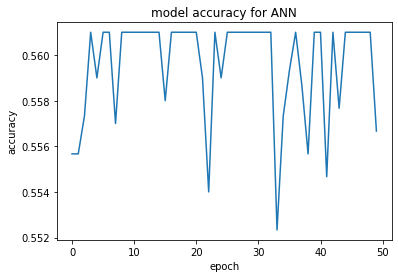

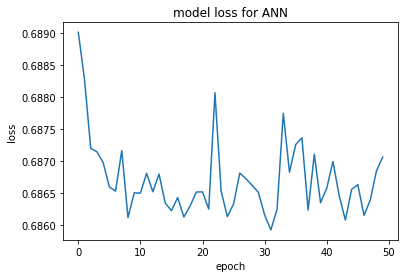

In [ ]:
print(mymodel.history.keys())
# summarize history for accuracy
plt.plot(mymodel.history['accuracy'])
# plt.plot(mymodel.history['val_accuracy'])
plt.title('model accuracy for ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('ann_accu')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()
 #summarize history for loss
plt.plot(mymodel.history['loss'])
# plt.plot(mymodel.history['val_loss'])
plt.title('model loss for ANN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('ann_loss')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

4/4 [==============================] - 0s 4ms/step - loss: 0.7075 - accuracy: 0.1500
At SNR = -5
accuracy: 15.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.1400
At SNR = -4
accuracy: 14.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.2200
At SNR = -3
accuracy: 22.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.1600
At SNR = -2
accuracy: 16.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.2600
At SNR = -1
accuracy: 26.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.3200
At SNR = 0
accuracy: 32.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.4500
At SNR = 1
accuracy: 45.00%
4/4 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.4900
At SNR = 2
accuracy: 49.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5000
At SNR

No handles with labels found to put in legend.


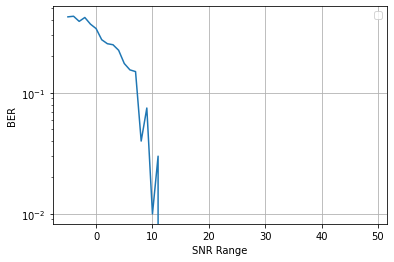

In [ ]:
pd_FM = {}
idx=0
X_FM_lb=[]
for snr in range(-5, 50, 1):
  X_FM_lb.append(X[idx:idx+100])
  idx=idx+100

#print(X_FM_lb)


for snr in range(-5, 50, 1):
  y_snr = np.ones((X_FM_lb[snr+5].shape[0], 1))
  scores = model.evaluate(X_FM_lb[snr+5], y_snr)
  # print(scores)
  print("At SNR = " + str(snr) + "\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  pd_FM[snr] =(1- scores[1])/2
  
plt.plot(range(-5, 50, 1), list(pd_FM.values()))

# printing the graph
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('BER')
plt.grid()
plt.savefig('ann_orig')
plt.legend(loc='upper right',ncol = 1)
plt.savefig('snip')
plt.show()

# Innovation : Implementation of RNN ( layer: 5, perceptron: 10)

In [ ]:
from tensorflow.keras.layers import SimpleRNN,Bidirectional,GRU

np.reshape(X, (-1,1))
np.reshape(Y, (-1,1))

print(X.shape)

rnn_model =Sequential()

rnn_model = Sequential()
rnn_model.add(Embedding(int(X.max())+500, 1, input_length=1))

rnn_model.add(SimpleRNN(10,activation='relu'))



rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(rnn_model.summary())
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])

(5500, 1)
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 1, 1)              19860     
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, 10)                120       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 19,991
Trainable params: 19,991
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
my_rnn_model = rnn_model.fit(X,Y,validation_split=0.3,epochs=50,batch_size=10)
scores = rnn_model.evaluate(X, Y)
print(model.metrics_names)
print(scores)

Epoch 1/50
385/385 [==============================] - 2s 3ms/step - loss: 0.6914 - accuracy: 0.5413 - val_loss: 0.6902 - val_accuracy: 0.5421
Epoch 2/50
385/385 [==============================] - 1s 2ms/step - loss: 0.6854 - accuracy: 0.5503 - val_loss: 0.6911 - val_accuracy: 0.5421
Epoch 3/50
385/385 [==============================] - 1s 2ms/step - loss: 0.6776 - accuracy: 0.5765 - val_loss: 0.6921 - val_accuracy: 0.5409
Epoch 4/50
385/385 [==============================] - 1s 2ms/step - loss: 0.6725 - accuracy: 0.5914 - val_loss: 0.6940 - val_accuracy: 0.5415
Epoch 5/50
385/385 [==============================] - 1s 2ms/step - loss: 0.6626 - accuracy: 0.6074 - val_loss: 0.6938 - val_accuracy: 0.5118
Epoch 6/50
385/385 [==============================] - 1s 2ms/step - loss: 0.6599 - accuracy: 0.6048 - val_loss: 0.6950 - val_accuracy: 0.5106
Epoch 7/50
385/385 [==============================] - 1s 2ms/step - loss: 0.6569 - accuracy: 0.6100 - val_loss: 0.6958 - val_accuracy: 0.5136
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


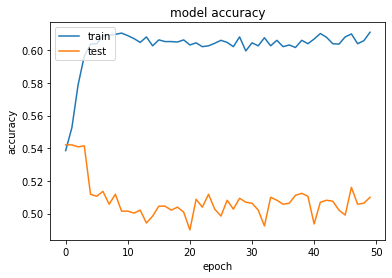

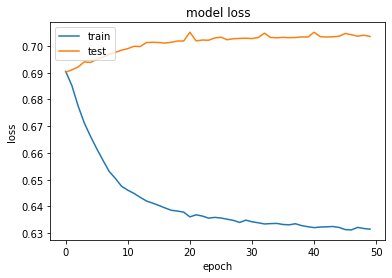

In [ ]:
print(my_rnn_model.history.keys())
# summarize history for accuracy
plt.plot(my_rnn_model.history['accuracy'])
plt.plot(my_rnn_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('snip2')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 #summarize history for loss
plt.plot(my_rnn_model.history['loss'])
plt.plot(my_rnn_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('snip1')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

51
4/4 [==============================] - 0s 5ms/step - loss: 0.7167 - accuracy: 0.1500
At SNR = -5
accuracy: 15.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.1400
At SNR = -4
accuracy: 14.00%
4/4 [==============================] - 0s 4ms/step - loss: 0.6988 - accuracy: 0.2200
At SNR = -3
accuracy: 22.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.1600
At SNR = -2
accuracy: 16.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.2600
At SNR = -1
accuracy: 26.00%
4/4 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.3200
At SNR = 0
accuracy: 32.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.4400
At SNR = 1
accuracy: 44.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.6322 - accuracy: 0.4800
At SNR = 2
accuracy: 48.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.4800
At 

No handles with labels found to put in legend.


At SNR = 45
accuracy: 88.00%


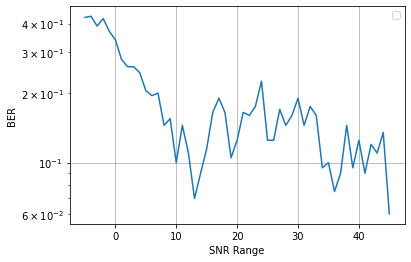

In [ ]:
pd_FM = {}
idx=0
X_FM_lb=[]
for snr in range(-5, 46, 1):
  X_FM_lb.append(X[idx:idx+100]) # Here we are using difference of 100
  idx=idx+100

print(len(X_FM_lb))


for snr in range(-5, 46, 1):
  y_snr = np.ones((X_FM_lb[snr].shape[0], 1))
  scores = rnn_model.evaluate(X_FM_lb[snr+5], y_snr)
  print("At SNR = " + str(snr) + "\n%s: %.2f%%" % (rnn_model.metrics_names[1], scores[1]*100))
  pd_FM[snr] =(1- scores[1])/2
  
plt.plot(range(-5, 46, 1), list(pd_FM.values())) #setting the range of the BER


plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('BER')
plt.grid()
plt.legend(loc='upper right',ncol = 1)
plt.savefig('snip')
plt.show()